In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df_NOON = pd.read_csv('NOON Historical Data.csv', parse_dates=True)
df_EPAY = pd.read_csv('EPAY Historical Data.csv', parse_dates=True, sep=",")
mergeTable= pd.merge(df_NOON,df_EPAY,how="inner",on='Date')
mergeTable = mergeTable[['Price_x','Price_y']]
mergeTable

,Price_x,Price_y
0,65.00,44.35
1,65.00,44.35
2,65.00,40.79
3,65.00,40.79
4,65.00,38.50
5,65.00,38.50
6,65.00,38.06
7,65.00,38.06
8,65.00,38.14
9,65.00,38.14


In [4]:
x_bar = np.mean(mergeTable['Price_x'])
y_bar = np.mean(mergeTable['Price_y'])
print(x_bar)
print(y_bar)

65.94793103448276
39.212068965517254


In [5]:
mergeTable['x_var'] = (mergeTable['Price_x'] - x_bar)**2
print(mergeTable)

    Price_x  Price_y      x_var
0     65.00    44.35   0.898573
1     65.00    44.35   0.898573
2     65.00    40.79   0.898573
3     65.00    40.79   0.898573
4     65.00    38.50   0.898573
5     65.00    38.50   0.898573
6     65.00    38.06   0.898573
7     65.00    38.06   0.898573
8     65.00    38.14   0.898573
9     65.00    38.14   0.898573
10    65.00    39.10   0.898573
11    65.00    39.10   0.898573
12    65.00    39.55   0.898573
13    65.00    39.55   0.898573
14    65.00    38.22   0.898573
15    65.00    38.22   0.898573
16    65.00    40.71   0.898573
17    65.00    40.71   0.898573
18    65.00    39.62   0.898573
19    65.00    39.64   0.898573
20    67.00    40.23   1.106849
21    63.01    38.58   8.631439
22    67.00    39.94   1.106849
23    68.01    37.90   4.252128
24    68.00    36.87   4.210987
25    68.00    37.43   4.210987
26    70.00    36.49  16.419263
27    72.00    37.68  36.627539
28    69.47    37.93  12.404970


In [6]:
mergeTable['xy_cov'] = (mergeTable['Price_x'] - x_bar) * (mergeTable['Price_y'] - y_bar)
print(mergeTable)

    Price_x  Price_y      x_var     xy_cov
0     65.00    44.35   0.898573  -4.870404
1     65.00    44.35   0.898573  -4.870404
2     65.00    40.79   0.898573  -1.495770
3     65.00    40.79   0.898573  -1.495770
4     65.00    38.50   0.898573   0.674992
5     65.00    38.50   0.898573   0.674992
6     65.00    38.06   0.898573   1.092082
7     65.00    38.06   0.898573   1.092082
8     65.00    38.14   0.898573   1.016247
9     65.00    38.14   0.898573   1.016247
10    65.00    39.10   0.898573   0.106234
11    65.00    39.10   0.898573   0.106234
12    65.00    39.55   0.898573  -0.320335
13    65.00    39.55   0.898573  -0.320335
14    65.00    38.22   0.898573   0.940413
15    65.00    38.22   0.898573   0.940413
16    65.00    40.71   0.898573  -1.419935
17    65.00    40.71   0.898573  -1.419935
18    65.00    39.62   0.898573  -0.386690
19    65.00    39.64   0.898573  -0.405649
20    67.00    40.23   1.106849   1.070934
21    63.01    38.58   8.631439   1.856975
22    67.00

In [7]:
beta = mergeTable['xy_cov'].sum() / mergeTable['x_var'].sum()
alpha = y_bar - beta * x_bar
print(alpha)
print(beta)

64.88878669286532
-0.38934834383086653


In [8]:
y_pred = alpha + beta * mergeTable['Price_x']
print(y_pred)

0     39.581144
1     39.581144
2     39.581144
3     39.581144
4     39.581144
5     39.581144
6     39.581144
7     39.581144
8     39.581144
9     39.581144
10    39.581144
11    39.581144
12    39.581144
13    39.581144
14    39.581144
15    39.581144
16    39.581144
17    39.581144
18    39.581144
19    39.581144
20    38.802448
21    40.355948
22    38.802448
23    38.409206
24    38.413099
25    38.413099
26    37.634403
27    36.855706
28    37.840757
Name: Price_x, dtype: float64


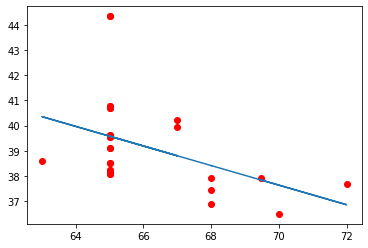

In [9]:
plt.scatter(mergeTable['Price_x'], mergeTable['Price_y'], color='r')
plt.plot(mergeTable['Price_x'], y_pred)
plt.show()